# Étude Statistique Accident d'avion - EDA des accidents

L'analyse de la probabilité de mourir dans un accident d'avion est une étude statistique qui vise à évaluer le risque de décès lors d'un vol. Cette analyse utilise des données sur les accidents d'avion passés pour estimer la probabilité de décès en cas d'accident. Elle peut également tenir compte de facteurs tels que la compagnie aérienne, le type d'avion et les itinéraires de vol pour affiner les résultats. L'objectif de cette analyse est d'aider les voyageurs à comprendre les risques associés aux voyages en avion.

Pour se faire nous utiliserons la base de données de l'ASN qui recense tous les accidents d'avions dans le monde. https://aviation-safety.net/database/

Combiné à la cela pour estimer la probabilité de subir un accident, nous allons utiliser les données Statistica sur le traffic aérien par année de 2004 à ce jour.

https://www.statista.com/statistics/564769/airline-industry-number-of-flights/

J'aurais apprécié une base de données plus détaillée avec le trafic par pays mais il s'agit du mieux que j'ai pu trouver en open data.

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [347]:
df1 = pd.read_csv("/Users/stratospheric/Documents/Plane Crash/ASN Database 1960-1980.csv")
df2 = pd.read_csv("/Users/stratospheric/Documents/Plane Crash/ASN Database 1981-2000.csv")
df3 = pd.read_csv("/Users/stratospheric/Documents/Plane Crash/ASN Database 2001-2022.csv")

df3.head()

,Date,Model,Operator,Fatalities,Location,Category,Registration
0,04-JAN-2001,Shaanxi Yunshuji Y-8,China Air Force,8+ 6,China,A1,31242
1,04-JAN-2001,Shaanxi Yunshuji Y-8,China Air Force,8,China,A1,31243
2,04-JAN-2001,Learjet 35,Air Response North,0,USA,A1,N435JL
3,05-JAN-2001,Boeing 727-46F,Air Gemini Cargo,0+ 1,Angola,A1,S9-BAI
4,06-JAN-2001,BN-2A-2 Islander,Guyana AF,3,Guyana,A1,8R-GFN


In [373]:
df = pd.concat([df1,df2,df3]).reset_index()

In [374]:
df.drop('index', axis=1, inplace=True)

In [375]:
df.head()

,Date,Model,Operator,Fatalities,Location,Category,Registration
0,03-JAN-1960,Douglas C-47A (DC-3),Indian Airlines,9,India,A1,VT-CGG
1,03-JAN-1960,Lockheed L-749A Constellation,Eastern Air Lines,0,USA,A1,N110A
2,04-JAN-1960,Curtiss C-46A,T.A. Salvador,0,Brazil,A1,PP-SLJ
3,04-JAN-1960,U-1A Otter (DHC-3),US Army,10,Libya,A1,55-2974
4,05-JAN-1960,Vickers 701 Viscount,BEA,0,Malta,A1,G-AMNY


In [365]:
df.dtypes

Date            object
Model           object
Operator        object
Fatalities      object
Location        object
Category        object
Registration    object
dtype: object

In [7]:
df.isnull().sum()

Date               0
Model              0
Operator           3
Fatalities       960
Location           0
Category           0
Registration    1034
dtype: int64

In [8]:
df['Registration'].nunique()

13638

In [9]:
df['Model'].nunique()

2577

Il y a quelques transformations à effectuer sur le type des colonnes, notamment mettre la date en format date et fatalities en format numeric int.

In [10]:
df.shape

(15004, 7)

In [376]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

df = df.drop_duplicates()

In [367]:
df.shape

(14997, 7)

In [377]:
df[['Day', 'Month', 'Year']] = df['Date'].str.split('-', expand=True)

In [369]:
df.head()

,Date,Model,Operator,Fatalities,Location,Category,Registration,Day,Month,Year
0,03-JAN-1960,Douglas C-47A (DC-3),Indian Airlines,9,India,A1,VT-CGG,03,JAN,1960
1,03-JAN-1960,Lockheed L-749A Constellation,Eastern Air Lines,0,USA,A1,N110A,03,JAN,1960
2,04-JAN-1960,Curtiss C-46A,T.A. Salvador,0,Brazil,A1,PP-SLJ,04,JAN,1960
3,04-JAN-1960,U-1A Otter (DHC-3),US Army,10,Libya,A1,55-2974,04,JAN,1960
4,05-JAN-1960,Vickers 701 Viscount,BEA,0,Malta,A1,G-AMNY,05,JAN,1960


In [378]:
df['Year'] = df['Year'].astype(int)

La colonne `Fatalities` possède une spécificité. Lorsque l'accident a entrainé des victimes qui ne sont pas dans l'avion cela est enregistré comme ceci "10+3"

Ce qui rend impossible la conversion en format numérique sans effacer ces données c'est pourquoi nous allons séparer les victimes dans l'avion et celles a l'extérieur de l'avion.

Fatalities_A : Les victimes présentes dans l'avion
Fatalities_B : Les victimes a l’extérieur de l’appareil 

In [ ]:
df[['Fatalities_A', 'Fatalities_B']] = df['Fatalities'].str.split('+',expand=True)

In [381]:
#df['Fatalities'] = pd.to_numeric(df['Fatalities'], errors='coerce')
df['Fatalities_A'] = pd.to_numeric(df['Fatalities_A'], errors='coerce')
df['Fatalities_B'] = pd.to_numeric(df['Fatalities_B'], errors='coerce')

In [397]:
df['Fatalities_B'] = df['Fatalities_B'].fillna(0)
df['Fatalities_A'] = df['Fatalities_A'].fillna(0)
df['Fatalities'] = df['Fatalities_A'] + df['Fatalities_B']

In [384]:
df['Day'] = pd.to_numeric(df['Day'], errors='coerce')
df['Day'] = df['Day'].fillna(method='bfill', axis=0).fillna(0)

In [388]:
df.dtypes

Date             object
Model            object
Operator         object
Fatalities      float64
Location         object
Category         object
Registration     object
Day             float64
Month            object
Year              int64
Fatalities_A    float64
Fatalities_B    float64
dtype: object

In [19]:
#df.drop('Date', axis=1, inplace=True)

In [398]:
df.head()

,Date,Model,Operator,Fatalities,Location,Category,Registration,Day,Month,Year,Fatalities_A,Fatalities_B
0,03-JAN-1960,Douglas C-47A (DC-3),Indian Airlines,9.0,India,A1,VT-CGG,3.0,JAN,1960,9.0,0.0
1,03-JAN-1960,Lockheed L-749A Constellation,Eastern Air Lines,0.0,USA,A1,N110A,3.0,JAN,1960,0.0,0.0
2,04-JAN-1960,Curtiss C-46A,T.A. Salvador,0.0,Brazil,A1,PP-SLJ,4.0,JAN,1960,0.0,0.0
3,04-JAN-1960,U-1A Otter (DHC-3),US Army,10.0,Libya,A1,55-2974,4.0,JAN,1960,10.0,0.0
4,05-JAN-1960,Vickers 701 Viscount,BEA,0.0,Malta,A1,G-AMNY,5.0,JAN,1960,0.0,0.0


## EDA

In [399]:
print(df['Fatalities'].sum())

97383.0


In [400]:
print(df.shape)

(14997, 12)


Le nombre de victimes dans le monde entre 1960 et 2022 est de 97 383 personnes pour 14997 accidents.

In [401]:
fatal_no = df[(df['Fatalities'] > 0) & (df['Fatalities'].notnull())].shape[0]
print("Accidents impliquant au moins un décès:",fatal_no)

non_fatal = df[(df['Fatalities'] == 0) & (df['Fatalities'].notnull())].shape[0]
print("Accidents non fatal:",non_fatal)

print(f"Pourcentage d'accidents entrainant au moins un décès : {fatal_no/non_fatal*100:.2f}%")


Accidents impliquant au moins un décès: 5601
Accidents non fatal: 9396
Pourcentage d'accidents entrainant au moins un décès : 59.61%


Plus de 1 accident d'avion sur 2 entraine au moins un décès parmi les victimes.

### Répartition des accidents dans le monde

Voyons quels sont les 5 pays comptant le plus de victimes dans des accidents de 1960 à 2022 

In [402]:
loc_df = df.groupby('Location').agg({'Fatalities':'sum','Location':'size'})

In [403]:
loc_df = loc_df.rename(columns={'Location':'Count'}).reset_index()

In [404]:
loc_df = loc_df.sort_values(by='Fatalities', ascending=False)
loc_df.head()

,Location,Fatalities,Count
211,USA,12624.0,2928
165,Russia,7599.0,1038
95,Indonesia,2963.0,318
45,Colombia,2778.0,374
93,India,2621.0,285


On remarque que les USA comptent le plus de victimes d'accidents mais cela ne dit pas s'il s'agit d'une multitude d’accidents de petits avions ou de plus gros accidents.
Je vais donc calculer la moyenne des victimes d’accidents par pays.

In [405]:
avg_df = df.groupby('Location').agg({'Fatalities':'mean','Location':'size'}).rename(columns={'Location':'Count'}).reset_index()
avg_df = avg_df.sort_values(by='Fatalities', ascending=False)
avg_df.head()

,Location,Fatalities,Count
25,Benin,47.000000,3
94,Indian Ocean,43.538462,13
129,Mediterranean Sea,42.666667,12
46,Comoros,40.625000,8
21,Barbados,36.500000,2


On remarque que le classement change, c'est dans la Macédoine, l’ocean indien et le Bénin qui concentrent les accidents les plus graves.

Où s'est passée l'accident entrainant le plus de victimes ?

In [406]:
max_df = df.groupby('Location')['Fatalities'].max().reset_index()
max_df = max_df.sort_values(by='Fatalities', ascending=False)
max_df.head()

,Location,Fatalities
211,USA,1692.0
102,Japan,520.0
72,France,346.0
185,Spain,335.0
13,Atlantic Ocean,329.0


C'est au USA où s'est produit l'accident le plus grave depuis 1960, mais quand s'est il produit ?

In [409]:
idx = df['Fatalities'].idxmax()

print("Date:",df.at[idx,'Date'])
print("Model:",df.at[idx,'Model'])
print("Operator:",df.at[idx,'Operator'])

Date: 11-SEP-2001
Model: Boeing 767-223ER
Operator: American Airlines


Il s'agit du tragique 11 Septembre 2001, que nous connaissons tous. Si le nombre de victimes est si élevé, c'est parce qu'il inclut les victimes présente dans le World Trade Center.

Le second accident, le plus grave, s'est produit au Japon, impliquant cette fois-ci uniquement l'appareil et ses passagers.

In [410]:
idx = df['Fatalities_A'].idxmax()

print("Date:",df.at[idx,'Date'])
print("Model:",df.at[idx,'Model'])
print("Operator:",df.at[idx,'Operator'])

Date: 12-AUG-1985
Model: Boeing 747SR-46
Operator: JAL


"Le 12 août 1985, le Boeing 747SR-46 assurant le vol 123 de Japan Airlines entre Tokyo et Osaka, s'écrase près du mont Osutaka, à 100 km de Tokyo, au Japon. Il y a 520 morts parmi les 524 personnes à bord, ce qui en fait le pire accident de l'histoire impliquant un seul appareil" [Source Wikipedia](https://fr.wikipedia.org/wiki/Vol_Japan_Airlines_123)

### Les modeles les plus impliqués dans le plus d’accident.

In [412]:
model_df = df.groupby('Model')['Fatalities_A'].sum().reset_index()
model_df = model_df.sort_values(by='Fatalities_A', ascending=False)
model_df.head(10)

,Model,Fatalities_A
2462,Tupolev Tu-154M,1589.0
1560,Douglas C-47A (DC-3),1459.0
1415,DC-9-32,1355.0
2120,Lockheed C-130H Hercules,1253.0
159,Antonov An-26,1199.0
2019,Ilyushin Il-18V,1145.0
1462,DHC-6 Twin Otter 300,1042.0
1558,Douglas C-47 (DC-3),974.0
2447,Tupolev Tu-134A,871.0
155,Antonov An-24RV,843.0


Les modèles des constructeurs Douglas (DC) et Antonov apparaissent 3 fois dans les modèles impliqués dans des accidents mortels, dont notamment le Douglas C-47.

In [413]:
constructor = []
for model in df['Model']:
    constructor0 = model.split()[0]
    constructor.append(constructor0)
    

In [414]:
df['Constructor'] = constructor

In [415]:
df['Constructor'].nunique()

288

In [416]:
constructor_df = df.groupby('Constructor')['Fatalities'].sum().reset_index()
constructor_df = constructor_df.sort_values(by='Fatalities', ascending=False)
constructor_df.head(10)

,Constructor,Fatalities
53,Boeing,22757.0
178,Douglas,8964.0
9,Antonov,8289.0
214,Lockheed,7384.0
274,Tupolev,5924.0
205,Ilyushin,4961.0
6,Airbus,4150.0
185,Fokker,2575.0
184,Fairchild,1955.0
279,Vickers,1842.0


In [417]:
constructor_df['percent'] = (constructor_df['Fatalities']/df['Fatalities'].sum())*100
constructor_df.head(10)

,Constructor,Fatalities,percent
53,Boeing,22757.0,23.368555
178,Douglas,8964.0,9.204892
9,Antonov,8289.0,8.511753
214,Lockheed,7384.0,7.582432
274,Tupolev,5924.0,6.083197
205,Ilyushin,4961.0,5.094318
6,Airbus,4150.0,4.261524
185,Fokker,2575.0,2.644199
184,Fairchild,1955.0,2.007537
279,Vickers,1842.0,1.891501


On remarque, Boeing est l'avionneur ayant le plus de victimes à son actif, 2x plus que le second avionneur Douglas.

Cependant, il serait faux de dire que Boeing (ou les autres de la liste) est l'avionneur le plus "dangereux" car :
- Les avions Boeing sont les plus utilisés dans le monde pour les vols commerciaux et donc la probabilité qu'un Boeing soit impliqué est grande
- Boeing à l'instar d'Airbus par exemple, existe depuis 1916 contre 1971 pour Airbus, la longévité augmente les chances d'être impliqués dans un accident.

Autrement dit, les faits sont là, mais il nous manque des informations pour pouvoir interpréter et tirer des conclusions.

De plus, en comparant avec les modèles, aucun modèle de Boeing n'apparait dans les 10 modèles les plus impliqués dans des accidents mortels.

### Tendances des accidents dans le temps, par catégories

Accident Categories:
- A = Accident
- I = Incident
- H = Hijacking
- C = Criminal occurrence (sabotage, shoot down)
- O= other occurrence (ground fire, sabotage)
- U= type of occurrence unknown

- 1 = hull-loss
- 2 = repairable damage

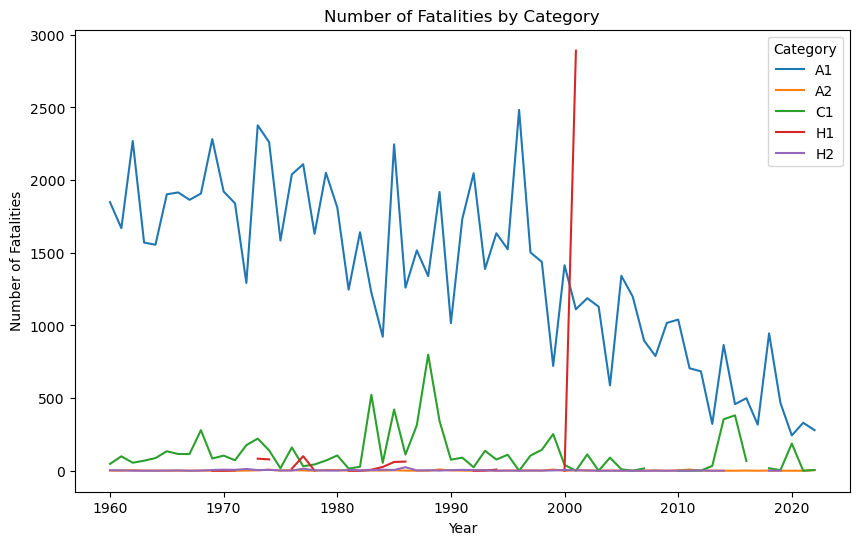

In [418]:
cat_fatality = df.groupby(['Category', 'Year']).agg({'Fatalities': 'sum'}).reset_index()


# Sort the values by number of fatalities and take only the top 5 categories
top_5 = cat_fatality.groupby('Category').agg({'Fatalities': 'sum'}).sort_values(by='Fatalities', ascending=False).head(5).index

# Filter the data to keep only the top top 5 categories
cat_top5 = cat_fatality[cat_fatality['Category'].isin(top_5)]

# Pivot the data to have a column for each category and a row for each year
cat_pivot = cat_top5.pivot(index='Year', columns='Category', values='Fatalities')

# Plot the data as a line chart
cat_pivot.plot.line(figsize=(10, 6))

# Add a title and axis labels
plt.title('Number of Fatalities by Category')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')

# Display the plot
plt.show()

La chose la plus flagrante est ce pic traversant tout le graphique marquant très nettement le 11 septembre 2001.

On peut aussi clairement remarquer que le nombre d’accidents a diminué au fil des années, avec une chute nette à la fin des années 90.

Autrement dit, il est pratiquement 3x plus sûr de voyager en avion aujourd’hui qu'il ne l'était dans les années 60.

On constate aussi que l'aviation a connu un pic d'actes criminels importants tout au long des années 80 avec de nombreuses victimes.

### Les chances d'accidents

Nous allons maintenant répondre à la question centrale, quelle sont les probabilités de subir un accident d'avions.

Nous allons réaliser ce calcul sur la période 2004-2019, car nous ne disposons que de données à partir de 2004 sur le nombre de vols dans le monde, et 2019 car 2020 et la COVID-19 a fortement affecté le trafic mondial.

Cependant pour se faire il est nécessaire de distinguer les avions de lignes commerciaux, des autres types tel que les avions militaires ou les avions de tourisme. 

In [284]:
fly_df = pd.read_csv("/Users/stratospheric/Documents/Plane Crash/Flight number by year.csv")
fly_df.head()

,Years,Flight (in millions)
0,2004,23.8
1,2005,24.9
2,2006,25.5
3,2007,26.7
4,2008,26.5


In [282]:
fly_df.dtypes

Years                    int64
Flight (in millions)    object
dtype: object

In [286]:
fly_df['Flight (in millions)'] = fly_df['Flight (in millions)'].astype('float')

In [419]:
dfb = df[(df['Year'] < 2020) & (df['Year'] > 2003)]

In [420]:
dfb.shape

(3420, 13)

Il y a eu 3420 accidents (toutes catégories) enregistrés entre 2019 et 2004.

In [421]:
#Calcul combien d'accident ont fait aucune victime
no_fatal = dfb[dfb['Fatalities'] == 0].shape[0]
fatal_m50 = dfb[(dfb['Fatalities'] < 50) & (dfb['Fatalities'] != 0)].shape[0]
fatal_p50 = dfb[dfb['Fatalities'] >= 50].shape[0]
fatal_m100 = dfb[dfb['Fatalities'] >= 100].shape[0]

print("Accidents sans victime:",no_fatal)
print("Accidents avec moins de 50 victimes:",fatal_m50)
print("Accidents avec plus de 50 victimes:",fatal_p50)
print("Accidents avec plus de 100 victimes:",fatal_m100)

Accidents sans victime: 2553
Accidents avec moins de 50 victimes: 806
Accidents avec plus de 50 victimes: 61
Accidents avec plus de 100 victimes: 36


In [423]:
fatal_p50/dfb.shape[0]

0.01783625730994152

Les accidents majeurs avec plus de 50 victimes ne représente que 17% des accidents enregistrés. Dont 10% de catastrophes impliquants plus de 100 victimes.

Notre question est axé sur les accidents majeurs et la probabilité d'en subir. Nous allons donc se concentrer sur les accidents comptants plus de 50 victimes.

Ne prendre que ce segment permet d'exclure notamment les petits avions mais d'inclure les courts-courriers.

In [424]:
big_acc = dfb[dfb['Fatalities'] > 50]

Pour essayer d'être plus précis, nous allons exclure les avions militaires et les vols privées pour se focaliser uniquement sur les vols commerciaux que nous prenons tous.

In [425]:
big_acc = big_acc[~big_acc['Operator'].str.contains('AF', na=False)]
big_acc = big_acc[~big_acc['Operator'].str.contains('Force', na=False)]
big_acc = big_acc[~big_acc['Operator'].str.contains('private', na=False)]

In [291]:
big_acc.shape

(46, 11)

On observe qu'il n'y a plus que 46 accidents enregistrés.

Nous allons maintenant comparer cela avec le nombre de vols dans le monde par année

In [426]:
grouped = big_acc.groupby(['Category', 'Year']).size().reset_index()
grouped.rename(columns={0:'Count'}, inplace=True)


In [427]:
pivot1 = grouped.pivot(index='Year', columns='Category', values='Count')

In [ ]:
fly_df = fly_df[fly_df['Years'] < 2020]
fly_df.rename(columns={'Years':'Year'}, inplace=True)

In [429]:
total_df = pd.merge(pivot1, fly_df, on='Year')

In [430]:
total_df = total_df.fillna(0)
total_df['Total'] = total_df['A1'] + total_df['C1']

In [431]:
total_df['Probability'] = (total_df['Total']/(total_df['Flight (in millions)']*1000000))*100
total_df

,Year,A1,C1,Flight (in millions),Total,Probability
0,2004,2.0,0.0,23.8,2.0,0.000008
1,2005,7.0,0.0,24.9,7.0,0.000028
2,2006,5.0,0.0,25.5,5.0,0.000020
3,2007,5.0,0.0,26.7,5.0,0.000019
4,2008,3.0,0.0,26.5,3.0,0.000011
5,2009,3.0,0.0,25.9,3.0,0.000012
6,2010,5.0,0.0,27.8,5.0,0.000018
7,2011,2.0,0.0,30.1,2.0,0.000007
8,2012,2.0,0.0,31.2,2.0,0.000006
9,2014,3.0,1.0,33.0,4.0,0.000012


In [432]:
print("Moyenne de vols par an (Pré-Covid):",round(total_df['Flight (in millions)'].mean()),"millions")

Moyenne de vols par an (Pré-Covid): 30 millions


In [433]:
print("Moyenne d'accident par an (Pré-Covid):",round(total_df['Total'].mean()))

Moyenne d'accident par an (Pré-Covid): 4


In [434]:
total_df['Probability'].mean()

1.242542292913679e-05

La probabilité moyenne de subir un accident est extrêmement faible, avec une moyenne de 30 millions de vols par an pour 4 accidents majeurs. Soit un peu plus d'un seul accident pour 10 millions de vols.

Pour réaliser ce que cela signifie statistiquement, si nous vivions jusqu'à 83 ans, nous pourrions prendre l'avion 330 fois par jour pendant 82 ans sans être victime d'un accident majeur.

Sans oublier qu'au fil des années, l'aviation devient plus sûre, réduisant ainsi encore davantage la probabilité d’accident majeur.

In [435]:
df.to_csv("ASN Database.csv")